In [1]:
import pandas as pd
import os

In [2]:
PATH = 'F:/data_Perfusion'
path_bSVD = '/CTP/bSVD'
path_ROI = '/ROI'

In [3]:
bSVD_df = pd.read_csv(os.path.join(PATH+path_bSVD, 'bSVD.csv'))
bSVD_df.head()

,Unnamed: 0,Patient_ID,Series_Description,Series_ID,File_Path,Instance_Number,Patient_File
0,0,NCT68331,BAT,1.2.826.0.1.3680043.8.669.2018814113434.01.349...,F:/data_Perfusion/CTP/bSVD\001-001\NCT68331_DI...,1,F:/data_Perfusion/CTP/bSVD\001-001
1,1,NCT68331,BAT,1.2.826.0.1.3680043.8.669.2018814113434.01.349...,F:/data_Perfusion/CTP/bSVD\001-001\NCT68331_DI...,2,F:/data_Perfusion/CTP/bSVD\001-001
2,2,NCT68331,BAT,1.2.826.0.1.3680043.8.669.2018814113434.01.349...,F:/data_Perfusion/CTP/bSVD\001-001\NCT68331_DI...,3,F:/data_Perfusion/CTP/bSVD\001-001
3,3,NCT68331,BAT,1.2.826.0.1.3680043.8.669.2018814113434.01.349...,F:/data_Perfusion/CTP/bSVD\001-001\NCT68331_DI...,4,F:/data_Perfusion/CTP/bSVD\001-001
4,4,NCT68331,BAT,1.2.826.0.1.3680043.8.669.2018814113434.01.349...,F:/data_Perfusion/CTP/bSVD\001-001\NCT68331_DI...,5,F:/data_Perfusion/CTP/bSVD\001-001


In [4]:
bSVD_df = bSVD_df.drop_duplicates(subset='Series_ID', keep='first')

In [5]:
bSVD_df = bSVD_df.reset_index()
bSVD_df.head()

,index,Unnamed: 0,Patient_ID,Series_Description,Series_ID,File_Path,Instance_Number,Patient_File
0,0,0,NCT68331,BAT,1.2.826.0.1.3680043.8.669.2018814113434.01.349...,F:/data_Perfusion/CTP/bSVD\001-001\NCT68331_DI...,1,F:/data_Perfusion/CTP/bSVD\001-001
1,32,32,NCT68331,TTP,1.2.826.0.1.3680043.8.669.2018814113434.02.663...,F:/data_Perfusion/CTP/bSVD\001-001\NCT68331_DI...,1,F:/data_Perfusion/CTP/bSVD\001-001
2,64,64,NCT68331,BET,1.2.826.0.1.3680043.8.669.2018814113434.03.917...,F:/data_Perfusion/CTP/bSVD\001-001\NCT68331_DI...,1,F:/data_Perfusion/CTP/bSVD\001-001
3,96,96,NCT68331,FWHM,1.2.826.0.1.3680043.8.669.2018814113434.04.443...,F:/data_Perfusion/CTP/bSVD\001-001\NCT68331_DI...,1,F:/data_Perfusion/CTP/bSVD\001-001
4,128,128,NCT68331,Cmax,1.2.826.0.1.3680043.8.669.2018814113434.05.397...,F:/data_Perfusion/CTP/bSVD\001-001\NCT68331_DI...,1,F:/data_Perfusion/CTP/bSVD\001-001


In [68]:
content_list = bSVD_df.Series_Description.unique()
print(content_list)

['BAT' 'TTP' 'BET' 'FWHM' 'Cmax' 'NEI' 'dSoverS' 'MS' 'fMTT_with_DC'
 'fMTT_without_DC' 'CBV-AUC' 'CBF-bSVD' 'CBF2-bSVD' 'CBV-bSVD' 'CBV2-bSVD'
 'MTT-bSVD' 'MTT2-bSVD' 'Tmax-bSVD']


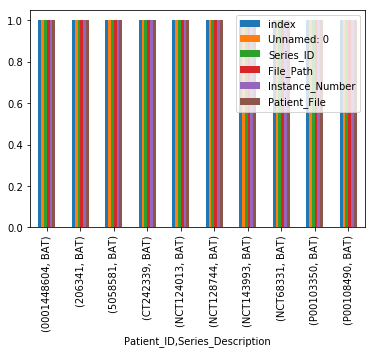

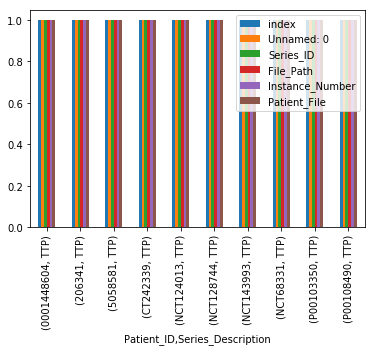

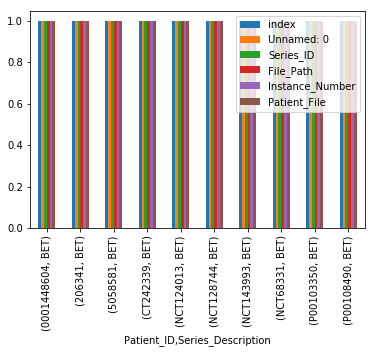

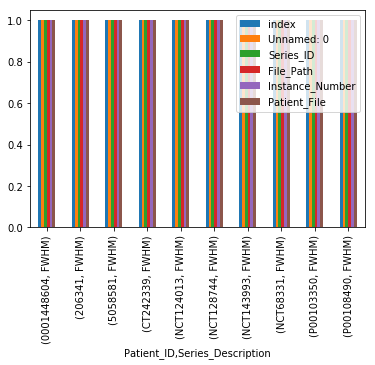

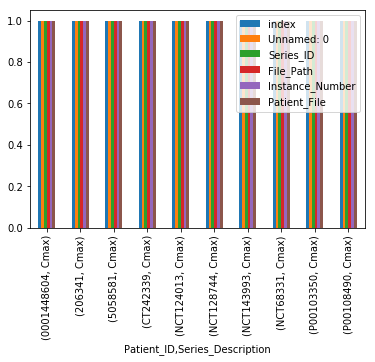

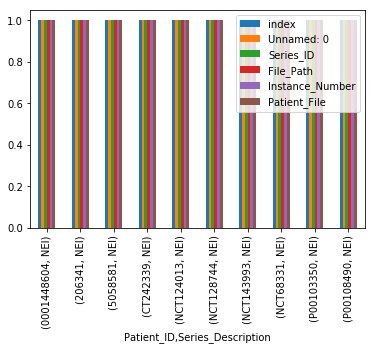

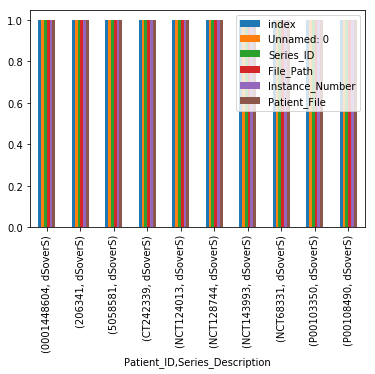

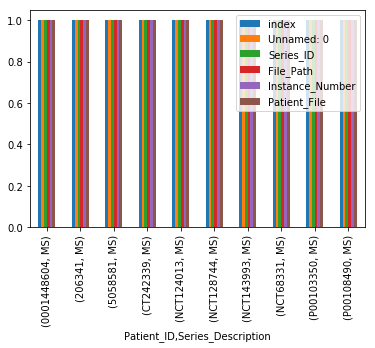

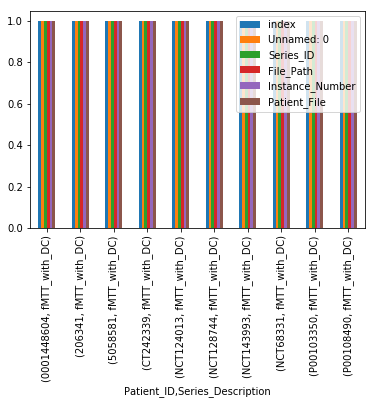

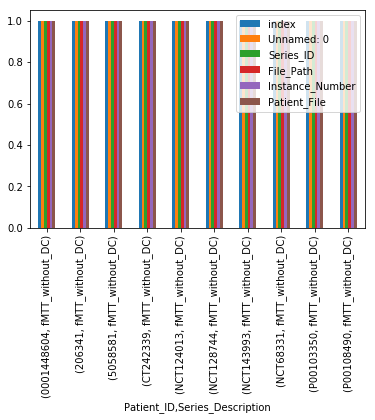

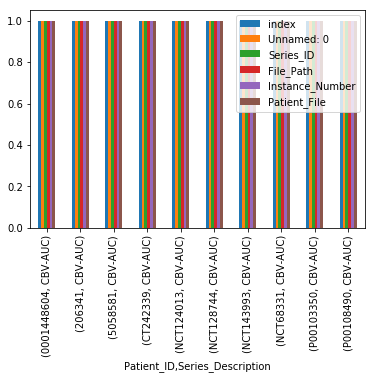

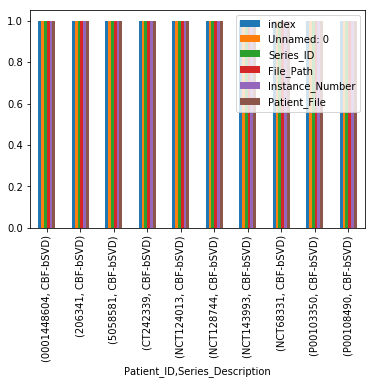

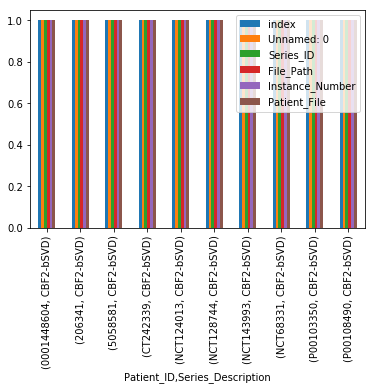

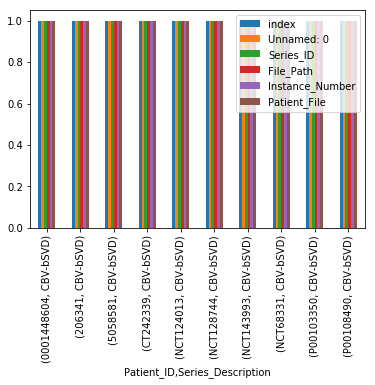

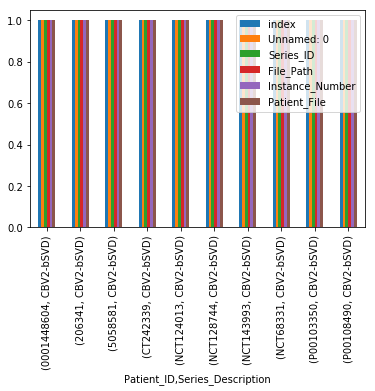

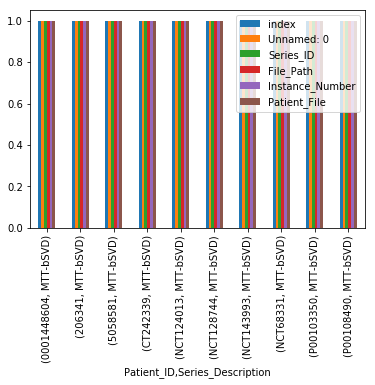

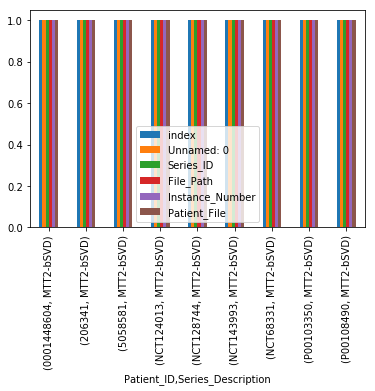

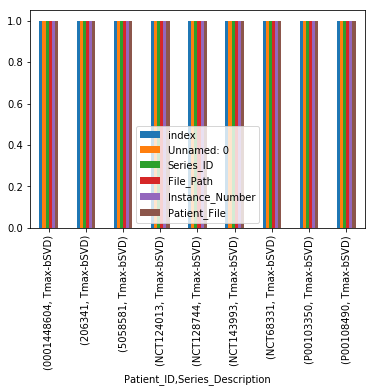

In [69]:
%matplotlib inline
for i in range(len(content_list)):
    bSVD_df[bSVD_df.Series_Description==content_list[i]].groupby(['Patient_ID', 'Series_Description']).count().plot(kind='bar')

In [16]:
import SimpleITK as sitk
def loadImageArray(filepath, seriesID):
    reader = sitk.ImageSeriesReader()
    dicom_names = reader.GetGDCMSeriesFileNames(filepath, seriesID)
    reader.SetFileNames(dicom_names)
    image = reader.Execute()
    image_array = sitk.GetArrayFromImage(image)
    return image_array

In [77]:
image_array = loadImageArray(bSVD_df.loc[0, 'Patient_File'], bSVD_df.loc[0, 'Series_ID'] )

In [28]:
df = bSVD_df[(bSVD_df.Series_Description=='CBV-bSVD') & (bSVD_df.Patient_ID=='NCT68331')].reset_index()

In [29]:
df.loc[0, 'Series_ID']

'1.2.826.0.1.3680043.8.669.2018814113434.21.9571023519'

In [78]:
image_array.shape

(32, 512, 512)

In [25]:
%matplotlib inline

In [26]:
import math
import matplotlib.pyplot as plt
def plot_dicom_file(img_array):
    print("img_array.shape = ", img_array.shape)
    
    win_lev=30
    win_wid=100/2
    w=[win_lev-win_wid, win_lev+win_wid]

    n_images = img_array.shape[0]
    ncol = 6
    nrow = math.ceil(n_images / ncol)
    
    plt.figure(figsize=(16, 16))
    for i in range(0, n_images):
        plt.subplot(nrow, ncol, i + 1)
        plt.imshow(img_array[i], cmap=plt.cm.gray, vmin=w[0], vmax=w[1])

img_array.shape =  (32, 512, 512)


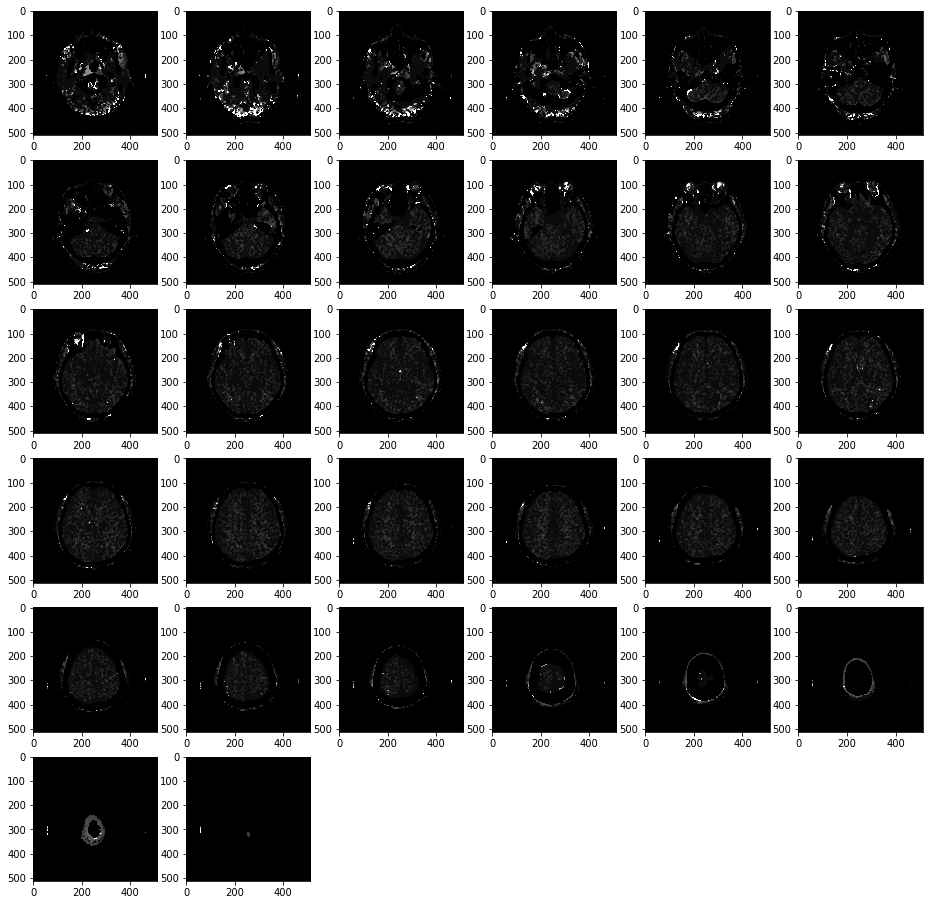

In [80]:
plot_dicom_file(image_array)

In [5]:
ROI_df = pd.read_csv(os.path.join(PATH+path_ROI, 'ROI.csv'))
ROI_df.head()

,Unnamed: 0,ROI_path
0,0,F:/data_Perfusion/ROI\001-001\ROI.npz
1,1,F:/data_Perfusion/ROI\001-017\ROI.npz
2,2,F:/data_Perfusion/ROI\001-073\ROI.npz
3,3,F:/data_Perfusion/ROI\001-112\ROI.npz
4,4,F:/data_Perfusion/ROI\002-022\ROI.npz


In [6]:
import numpy as np

In [7]:
data = np.load(ROI_df.ROI_path[1])

In [37]:
data.files

['arr_0', 'arr_1']

In [20]:
roi = data['arr_0'].all()

In [39]:
roi

{16: [],
 17: [[[226.0, 179.0],
   [225.0, 179.0],
   [223.0, 179.0],
   [218.0, 175.0],
   [216.0, 173.0],
   [216.0, 172.0],
   [215.0, 172.0],
   [214.0, 172.0],
   [212.0, 170.0],
   [210.0, 169.0],
   [210.0, 168.0],
   [210.0, 167.0],
   [207.0, 166.0],
   [205.0, 162.0],
   [203.0, 161.0],
   [202.0, 161.0],
   [200.0, 161.0],
   [200.0, 162.0],
   [200.0, 165.0],
   [200.0, 168.0],
   [200.0, 171.0],
   [200.0, 174.0],
   [200.0, 176.0],
   [202.0, 179.0],
   [204.0, 182.0],
   [207.0, 185.0],
   [209.0, 186.0],
   [211.0, 187.0],
   [212.0, 188.0],
   [213.0, 188.0],
   [214.0, 189.0],
   [215.0, 189.0],
   [215.0, 190.0],
   [215.0, 191.0],
   [215.0, 193.0],
   [215.0, 194.0],
   [215.0, 195.0],
   [215.0, 196.0],
   [214.0, 197.0],
   [213.0, 199.0],
   [213.0, 200.0],
   [213.0, 201.0],
   [213.0, 202.0],
   [210.0, 204.0],
   [209.0, 206.0],
   [207.0, 209.0],
   [204.0, 211.0],
   [203.0, 213.0],
   [201.0, 213.0],
   [201.0, 214.0],
   [201.0, 215.0],
   [201.0, 216.0],

In [13]:
CT_df = pd.read_csv(os.path.join(PATH+path_ROI, 'image.csv'))
CT_df.head()

,Unnamed: 0,Patient_ID,Series_ID,File_Path,Instance_Number,Patient_File
0,0,NCT68331,1.2.840.113619.2.416.2252895887868475954133130...,F:/data_Perfusion/ROI\001-001\Images\1,1,F:/data_Perfusion/ROI\001-001\Images
1,1,NCT68331,1.2.840.113619.2.416.2252895887868475954133130...,F:/data_Perfusion/ROI\001-001\Images\10,10,F:/data_Perfusion/ROI\001-001\Images
2,2,NCT68331,1.2.840.113619.2.416.2252895887868475954133130...,F:/data_Perfusion/ROI\001-001\Images\11,11,F:/data_Perfusion/ROI\001-001\Images
3,3,NCT68331,1.2.840.113619.2.416.2252895887868475954133130...,F:/data_Perfusion/ROI\001-001\Images\12,12,F:/data_Perfusion/ROI\001-001\Images
4,4,NCT68331,1.2.840.113619.2.416.2252895887868475954133130...,F:/data_Perfusion/ROI\001-001\Images\13,13,F:/data_Perfusion/ROI\001-001\Images


In [14]:
CT_df = CT_df.drop_duplicates(subset='Series_ID', keep='first')
CT_df = CT_df.reset_index()
CT_df.head()

,index,Unnamed: 0,Patient_ID,Series_ID,File_Path,Instance_Number,Patient_File
0,0,0,NCT68331,1.2.840.113619.2.416.2252895887868475954133130...,F:/data_Perfusion/ROI\001-001\Images\1,1,F:/data_Perfusion/ROI\001-001\Images
1,32,32,NCT143993,1.2.840.113619.2.416.1457109076854077903174317...,F:/data_Perfusion/ROI\001-017\Images\1,1,F:/data_Perfusion/ROI\001-017\Images
2,64,64,NCT128744,1.2.840.113619.2.416.3400619785795208103371759...,F:/data_Perfusion/ROI\001-073\Images\1,1,F:/data_Perfusion/ROI\001-073\Images
3,96,96,NCT124013,1.2.840.113619.2.416.3546264396282110951961319...,F:/data_Perfusion/ROI\001-112\Images\1,1,F:/data_Perfusion/ROI\001-112\Images
4,128,128,P00103350,1.2.840.113619.2.340.3.2831172362.545.14707855...,F:/data_Perfusion/ROI\002-022\Images\1,1,F:/data_Perfusion/ROI\002-022\Images


In [17]:
image_array = loadImageArray(CT_df.loc[1, 'Patient_File'], CT_df.loc[1, 'Series_ID'] )

In [18]:
image_array.shape

(32, 512, 512)

img_array.shape =  (32, 512, 512)


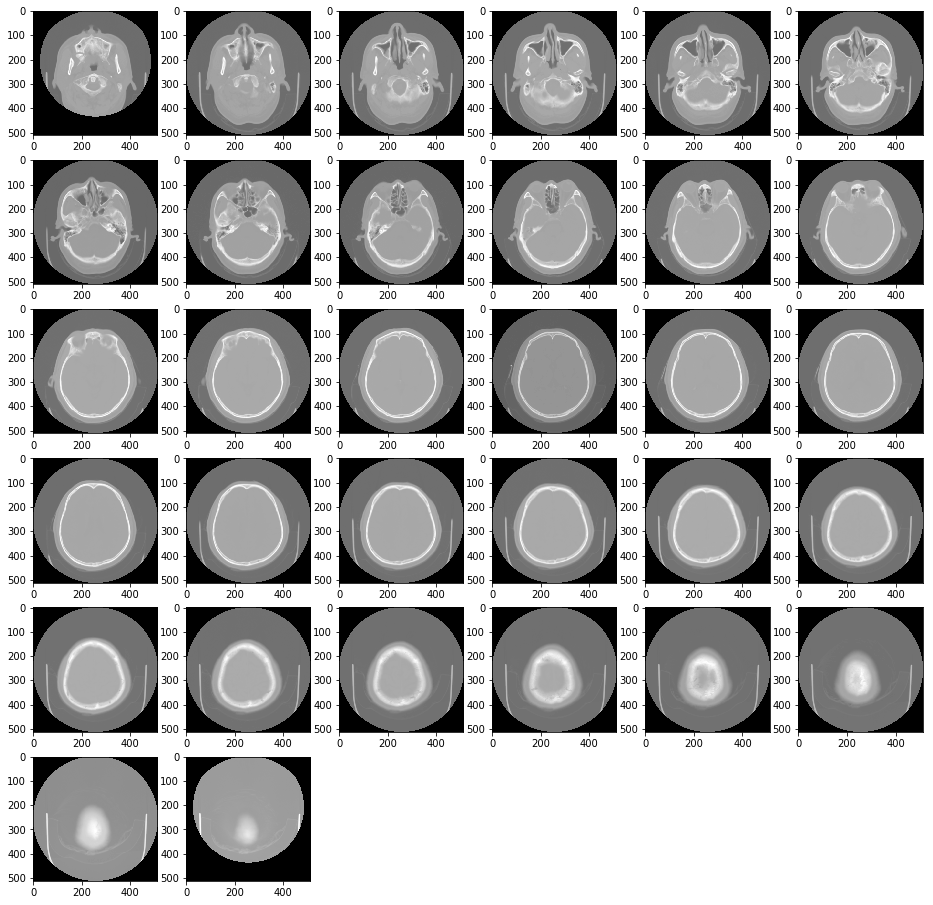

In [95]:
plot_dicom_file(image_array)

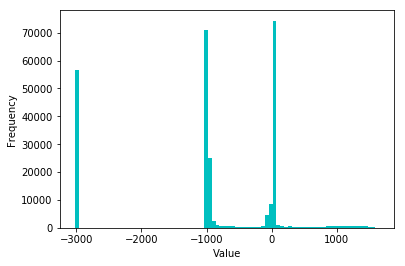

In [98]:
plt.hist(image_array[16].flatten(), bins=80, color='c')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

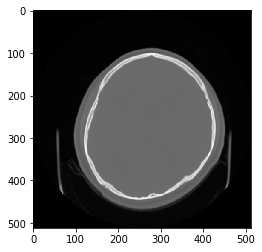

In [34]:
intercept = -1024
image_array[image_array == image_array.min()]= intercept
plt.imshow(image_array[16],cmap=plt.cm.gray)
plt.show()

img_array.shape =  (32, 512, 512)


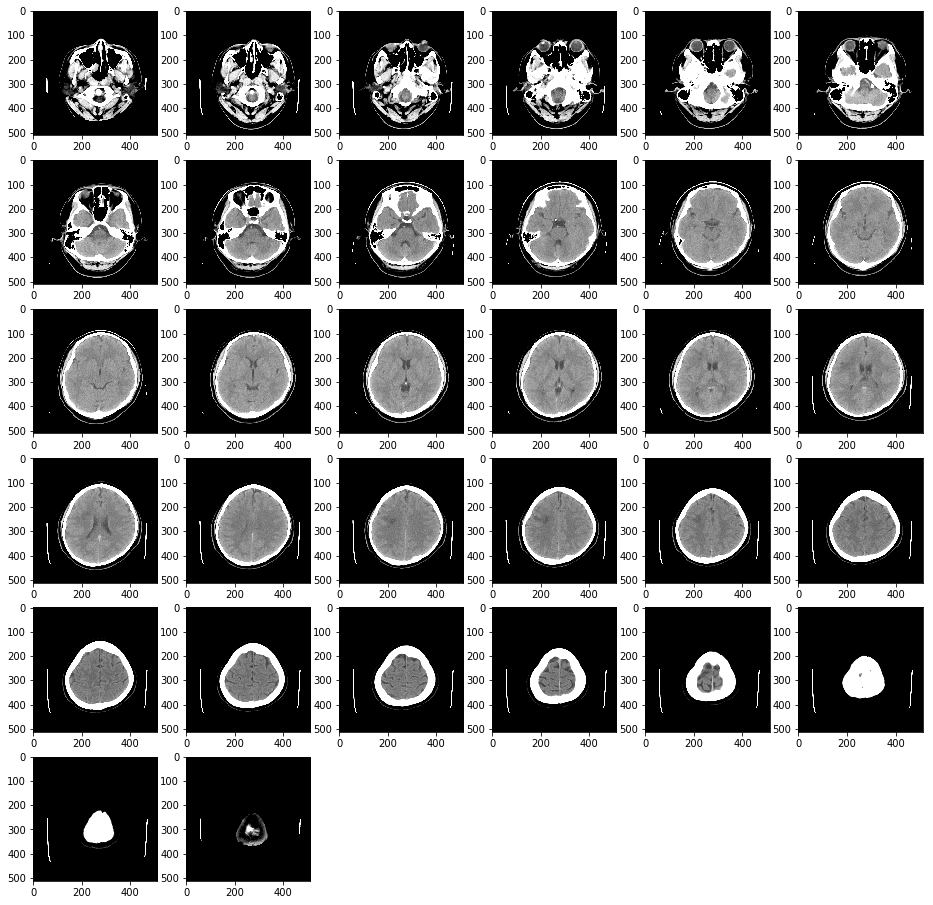

In [35]:
plot_dicom_file(image_array)

In [8]:
import cv2

In [22]:
def overlayROI(image_array, roi):
    background = np.zeros([image_array.shape[0], image_array.shape[1], image_array.shape[2]])
    for k in roi.keys():
#         try:
        point_sets = [np.array(x) for x in roi[k]]
        for p in range(len(point_sets)):
            point_set = np.int32([point_sets[p]])
            print(point_set.shape)
#             cv2.polylines(image_array[k], point_set,isClosed=True,  thickness=1, color=255 )
            cv2.fillConvexPoly(background[k], point_set, 1)
#         except:
#             print('error:',k)
    return background

In [23]:
mask = overlayROI(image_array, roi)

(1, 79, 2)
(1, 90, 2)
(1, 29, 2)
(1, 71, 2)
(1, 34, 2)
(1, 57, 2)
(1, 59, 2)
(1, 51, 2)
(1, 35, 2)


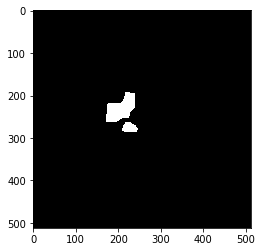

In [27]:
win_lev=30
win_wid=100/2
w=[win_lev-win_wid, win_lev+win_wid]
plt.imshow(mask[18], cmap=plt.cm.gray)
plt.show()